# Email Spam Model Using Naive Bayes Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

# Data Importation

In [3]:
dataset=pd.read_csv('emails.csv')

In [4]:
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
len(dataset)

5172

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Visualisation

Normal and spam


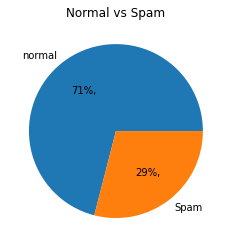

In [7]:
print("Normal and spam")
count_Class = pd.value_counts(dataset['Prediction'], sort=True)
count_Class.plot(kind = 'pie',labels=['normal','Spam'], autopct='%1.0f%%,')
plt.title('Normal vs Spam')
plt.ylabel('')
plt.show()

# Columns Selection

In [8]:
x,y= dataset.iloc[:,1:-1].values,dataset.iloc[:,-1].values

# Data Normalisation

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
x=MinMaxScaler().fit_transform(x)

# Data Spliting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [12]:
X_test.shape

(776, 3000)

# Data Training

In [13]:
gnb = GaussianNB()
gnbm= gnb.fit(X_train, y_train)
y_pred=gnbm.predict(X_test)

In [14]:
mltn = MultinomialNB()
mltnm = mltn.fit(X_train, y_train)
y_predm=mltnm.predict(X_test)

In [15]:
brn = BernoulliNB()
brnm= brn.fit(X_train, y_train)
y_predb =brnm.predict(X_test)

# Performance Evaluation

In [17]:
from sklearn.metrics import *

# Confusion Matrix 

GaussianNB

Text(0.5, 1.0, 'GaussianNB')

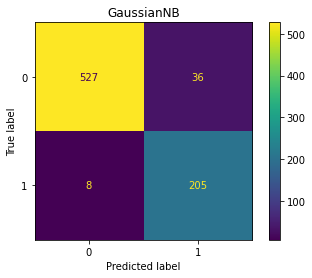

In [28]:
plot_confusion_matrix(gnbm,X_test,y_test)
plt.title('GaussianNB')

MultinomialNB

Text(0.5, 1.0, 'MultinomialNB')

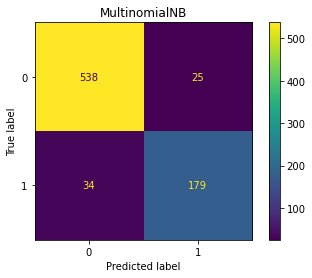

In [29]:
plot_confusion_matrix(mltnm,X_test,y_test)
plt.title('MultinomialNB')

BernoulliNB

Text(0.5, 1.0, 'BernoulliNB')

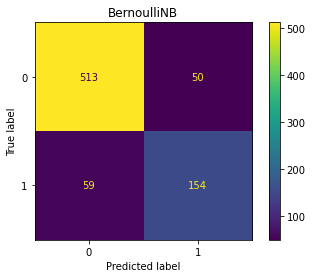

In [30]:
plot_confusion_matrix(brnm,X_test,y_test)
plt.title('BernoulliNB')

# Accuracy Score

In [21]:

labels=['gaussien','Multinomial','Bernoulli']
xl=[accuracy_score(y_pred,y_test),accuracy_score(y_predm,y_test),accuracy_score(y_predcm,y_test)]
data1=pd.DataFrame({
    'accuracy':xl,
    'label':labels
})

In [22]:
import seaborn as sns

(<AxesSubplot:xlabel='label', ylabel='count'>,
 0.923969    1
 0.943299    1
 0.940722    1
 Name: accuracy, dtype: int64)

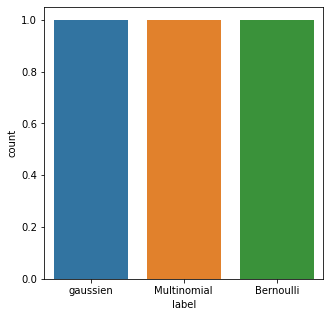

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='label',data=data1),data1['accuracy'].value_counts()


# Recall

In [24]:
xl1=[recall_score(y_pred,y_test),recall_score(y_predm,y_test),recall_score(y_predcm,y_test)]
data2=pd.DataFrame({
    'recall':xl1,
    'label':labels
})

(<AxesSubplot:xlabel='label', ylabel='count'>,
 0.849372    1
 0.850622    1
 0.877451    1
 Name: recall, dtype: int64)

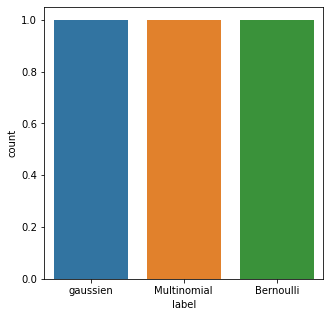

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='label',data=data2),data2['recall'].value_counts()


# F Score

In [31]:
xl3=[f1_score(y_pred,y_test),f1_score(y_predm,y_test),f1_score(y_predcm,y_test)]
data3=pd.DataFrame({
    'f_score':xl3,
    'label':labels
})

(<AxesSubplot:xlabel='label', ylabel='count'>,
 0.898230    1
 0.858513    1
 0.903084    1
 Name: f_score, dtype: int64)

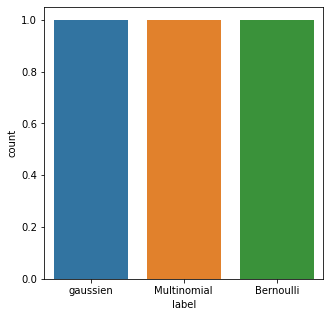

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='label',data=data3),data3['f_score'].value_counts()
# 